In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random

### 1) Implementation

In [2]:
M=4
P=2**M

Ns=100
Np=P

epsilon=0.01
Time_scale=int((100*P)/epsilon)

In [26]:
def ABM(Ns,Np,P,epsilon,Time_scale):
    
    states=np.arange(1,P+1)

    a=np.random.choice([-1,1],(Ns,P))
    Omega=np.random.normal(0,Np**(1/2),P)

    U0=np.random.normal(0,1,Ns)
    mu0=random.choice(states)

    A=[]
    U=np.copy(U0)
    mu=mu0
    mu_list=[mu0]
    for t in range(Time_scale):
        
        nt=np.heaviside(U,1)
        A.append(Omega[mu-1]+np.sum(nt*a[:,mu-1]))
        U=U-a[:,mu-1]*A[t]-epsilon
        mu=int((2*mu)%(2**M)+np.heaviside(A[t],1))
        mu_list.append(mu)
    return A,mu_list

In [4]:
A=ABM(Ns,Np,P,epsilon,Time_scale)[0]
T=np.arange(Time_scale)

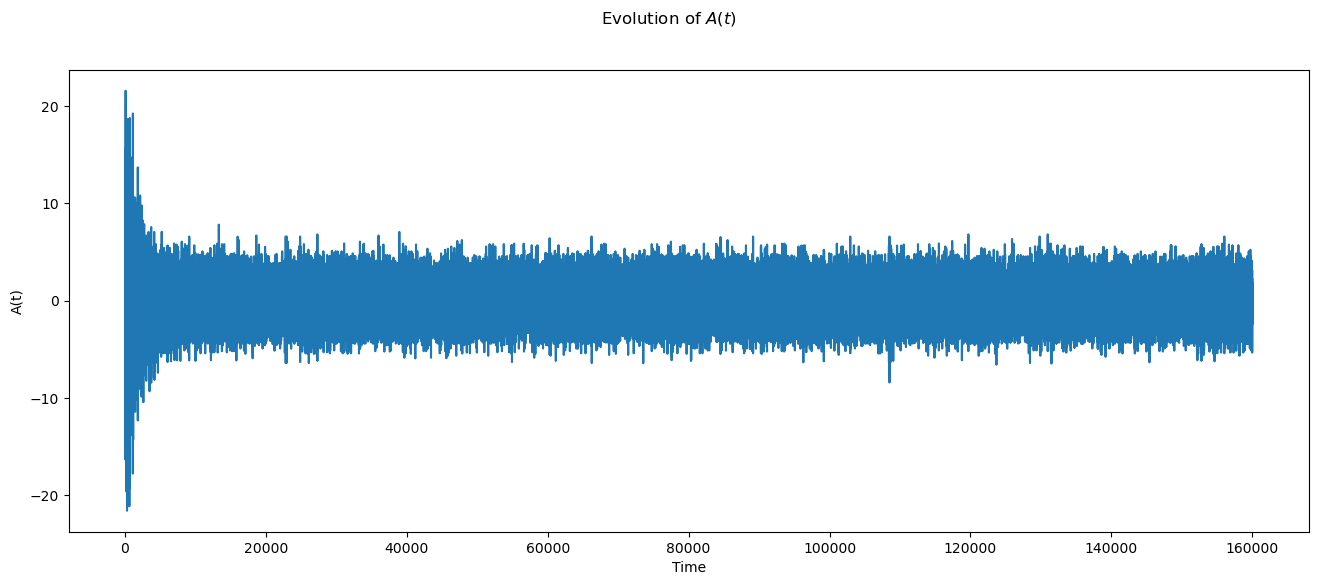

In [5]:
fig, ax = plt.subplots(figsize=(16,6))
fig.suptitle(r'Evolution of $A(t)$')
ax.plot(T,A)
ax.set_xlabel('Time')
ax.set_ylabel(r'A(t)')
plt.show()

In [6]:
Ns_big=10**4
A=ABM(Ns_big,Np,P,epsilon,Time_scale)[0]
T=np.arange(Time_scale)

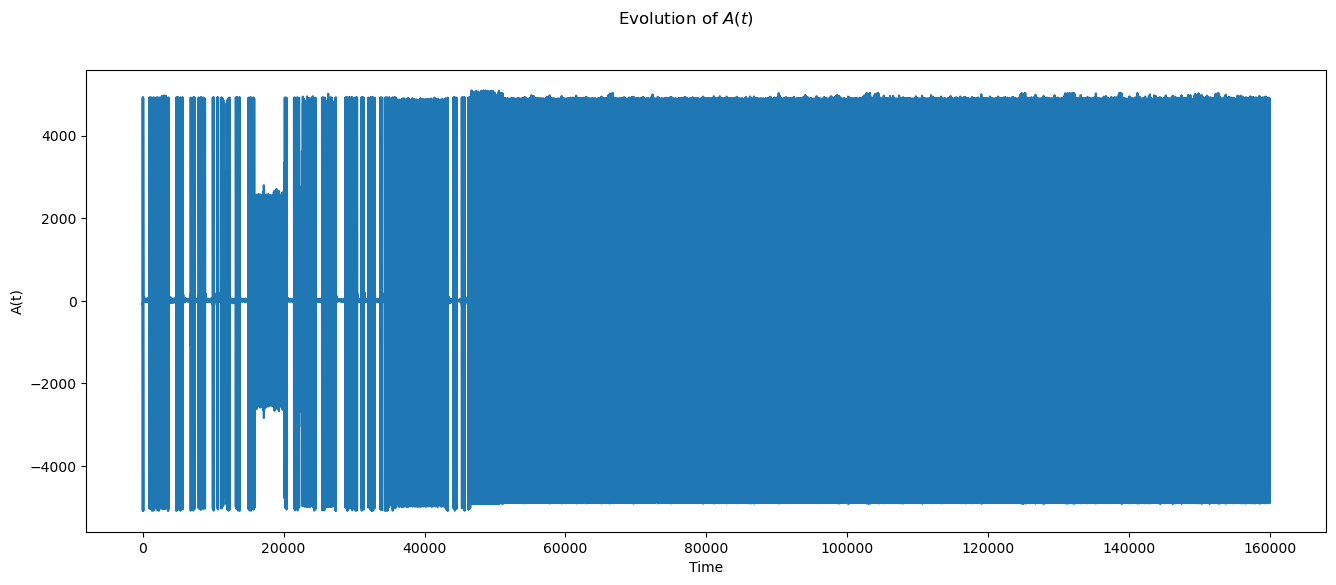

In [7]:
fig, ax = plt.subplots(figsize=(16,6))
fig.suptitle(r'Evolution of $A(t)$')
ax.plot(T,A)
ax.set_xlabel('Time')
ax.set_ylabel(r'A(t)')
plt.show()

### 2) Role of the parameters on the dynamics

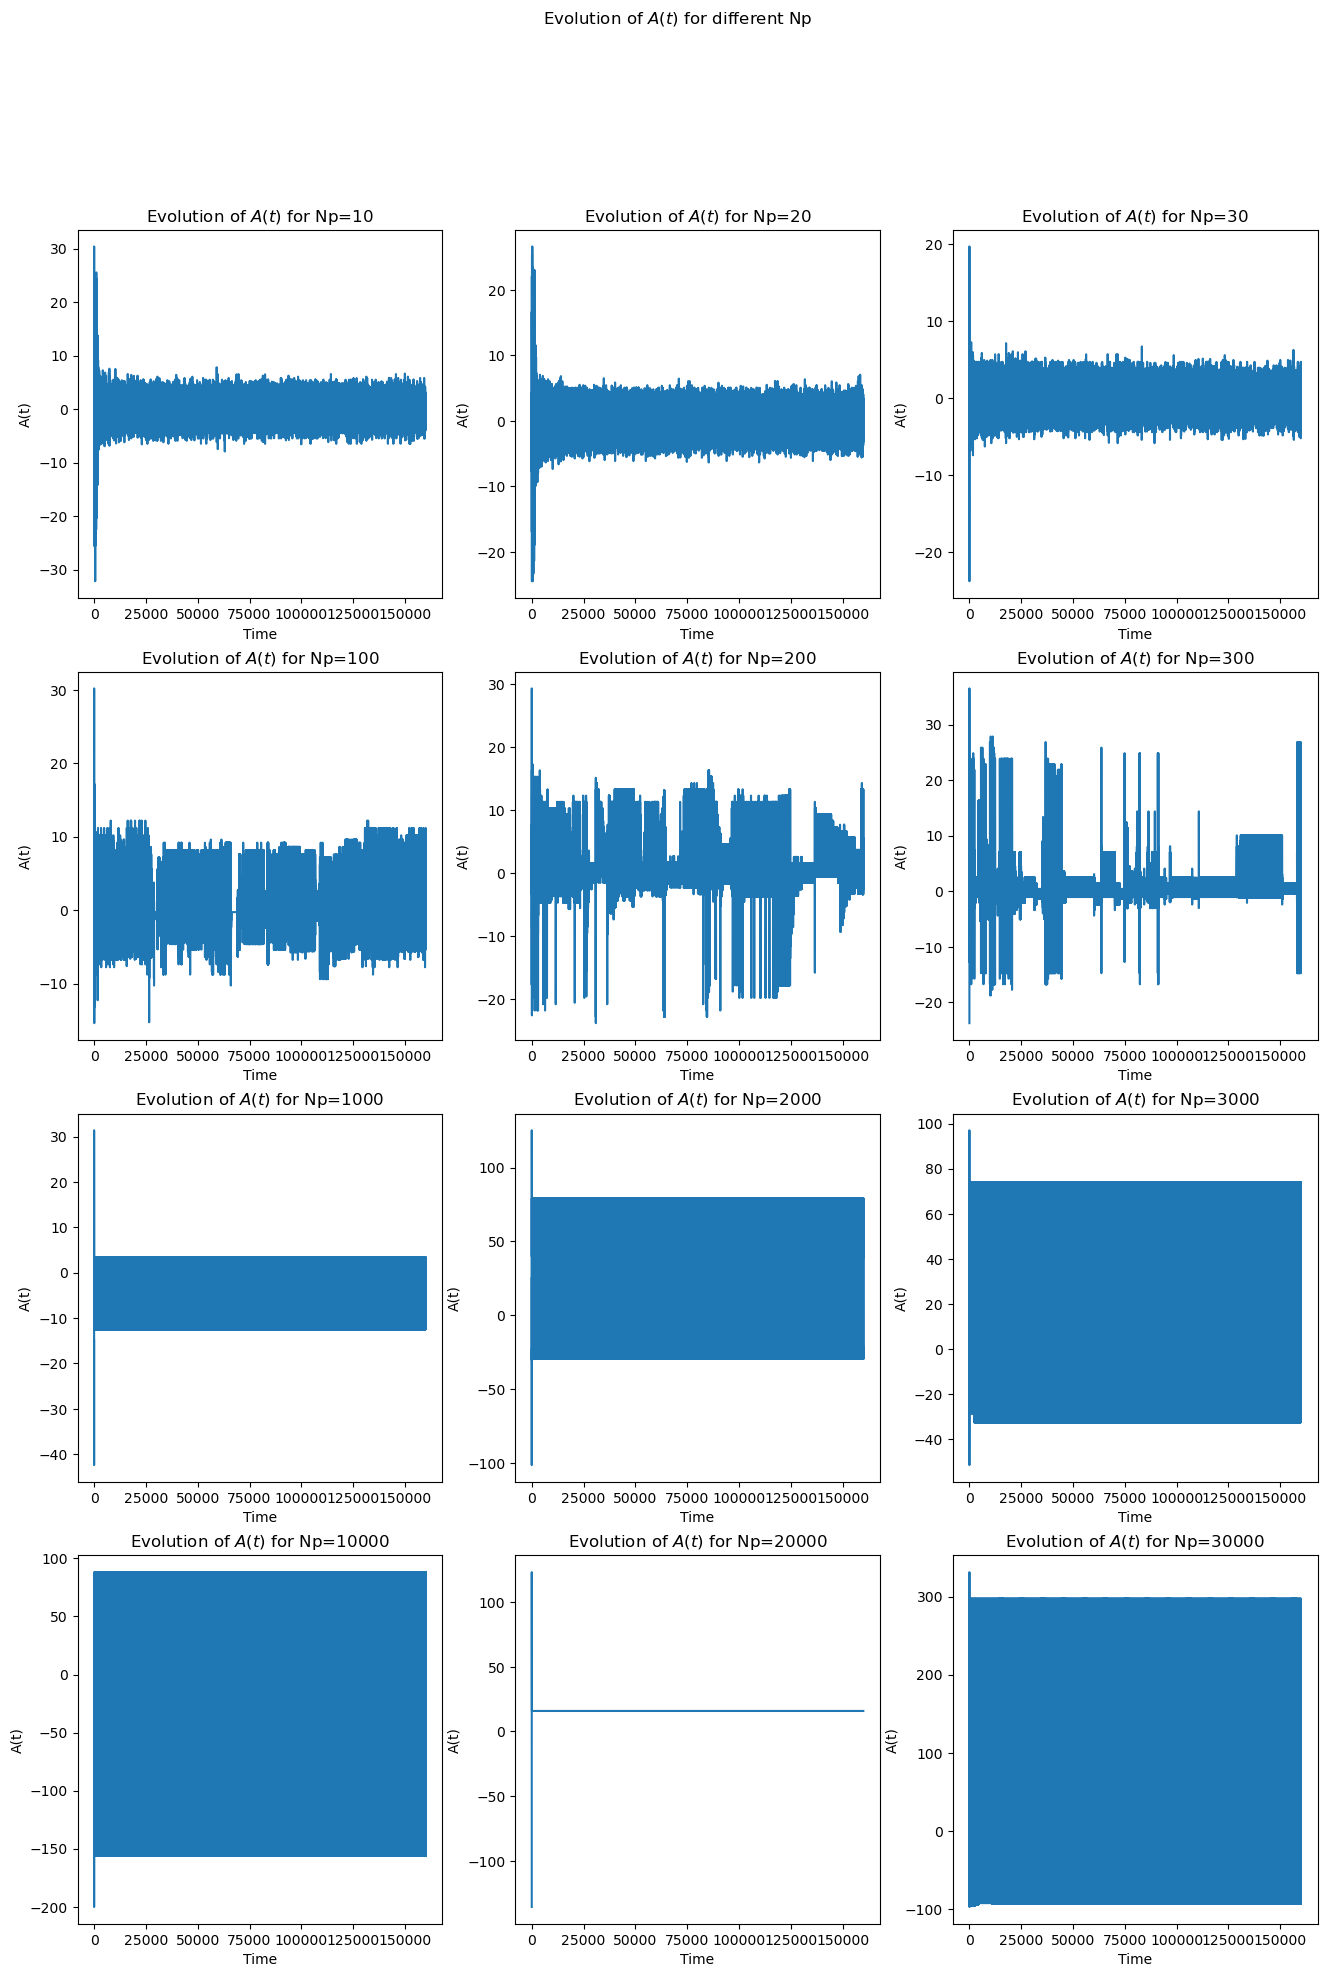

In [8]:
imin,imax=1,5
jmin,jmax=1,4

fig, ax = plt.subplots(imax-imin,jmax-jmin,figsize=(16,22))
fig.suptitle(r'Evolution of $A(t)$ for different Np' )

Ns=100

Np_range=[(10**i)*j for i in range(imin,imax) for j in range(jmin,jmax)]

for i in range(imax-imin):
    for j in range(jmax-jmin):
    
        Np=Np_range[i*(jmax-jmin)+j]
        A=ABM(Ns,Np,P,epsilon,Time_scale)[0]
        T=np.arange(Time_scale)

        ax[i,j].plot(T,A)
        ax[i,j].set_xlabel('Time')
        ax[i,j].set_ylabel(r'A(t)')
        ax[i,j].set_title(r'Evolution of $A(t)$ for ' +f'{Np=}' )


plt.show()

The more $N_p$ The more A(t) fluctuates, indeed if $N_s$ is relatively small compared to $N_p$ the $\Omega(t)$ term dominates the $A_{spec}(t)$ and we have A(t) ~~ $\Omega(t)$.
thus would have $A \sim \Omega \sim \mathcal{N}(0, N_p)$ 

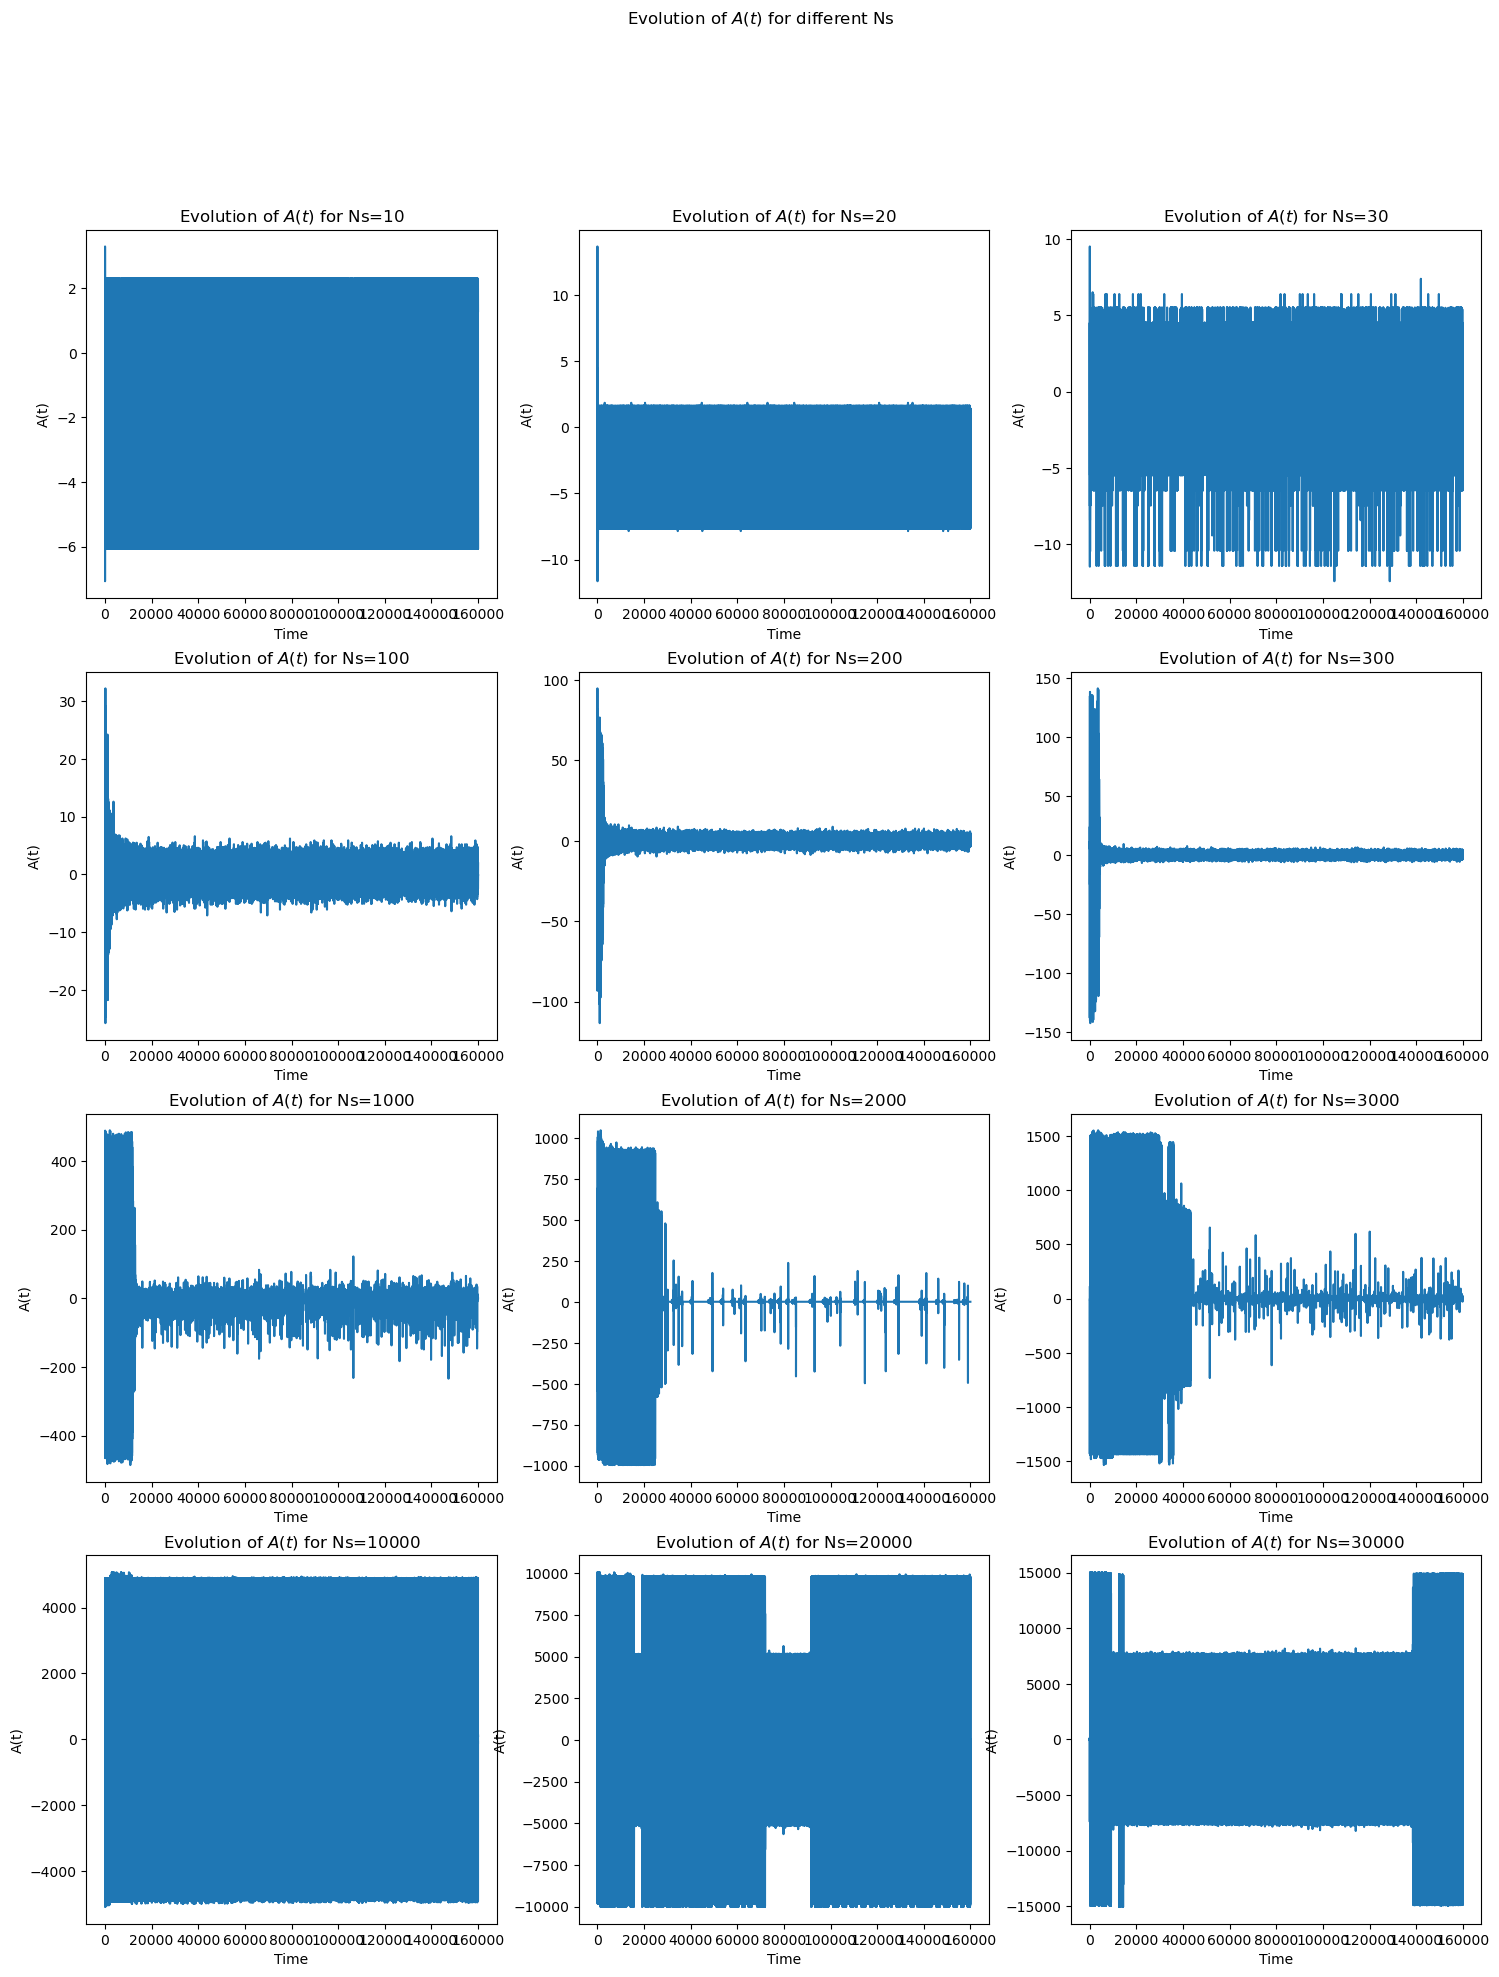

In [9]:
imin,imax=1,5
jmin,jmax=1,4

fig, ax = plt.subplots(imax-imin,jmax-jmin,figsize=(18,22))
fig.suptitle(r'Evolution of $A(t)$ for different Ns' )

Np=P

Ns_range=[(10**i)*j for i in range(imin,imax) for j in range(jmin,jmax)]

for i in range(imax-imin):
    for j in range(jmax-jmin):
    
        Ns=Ns_range[i*(jmax-jmin)+j]
        A=ABM(Ns,Np,P,epsilon,Time_scale)[0]
        T=np.arange(Time_scale)

        ax[i,j].plot(T,A)
        ax[i,j].set_xlabel('Time')
        ax[i,j].set_ylabel(r'A(t)')
        ax[i,j].set_title(r'Evolution of $A(t)$ for ' +f'{Ns=}' )


plt.show()

The greater $N_s$ The more A(t) fluctuates, indeed if we introduce many speculators to the market, their behaviour becomes completely random (an extreme case where producers are rare is like a marker where there is exclusevly speculators) which induces unstability.

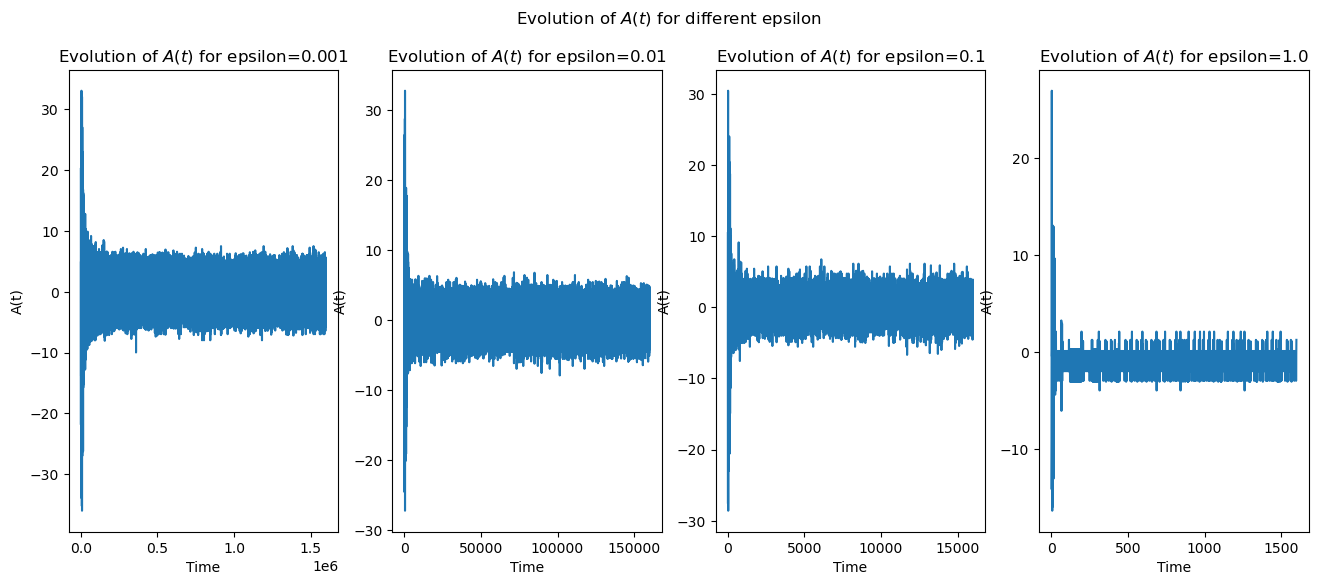

In [10]:
Ns=100
Np=P

epsilon_range=np.logspace(-3,0,4)
Time_scale_range=((100*P)/epsilon_range).astype(int)

fig,ax=plt.subplots(1,epsilon_range.shape[0],figsize=(16,6))
fig.suptitle(r'Evolution of $A(t)$ for different epsilon')


for i in range(epsilon_range.shape[0]):

    epsilon=epsilon_range[i]
    Time_scale=Time_scale_range[i]

    A=ABM(Ns,Np,P,epsilon,Time_scale)[0]
    T=np.arange(Time_scale)

    ax[i].plot(T,A)
    ax[i].set_xlabel('Time')
    ax[i].set_ylabel(r'A(t)')
    ax[i].set_title(r'Evolution of $A(t)$ for ' +f'{epsilon=}' )


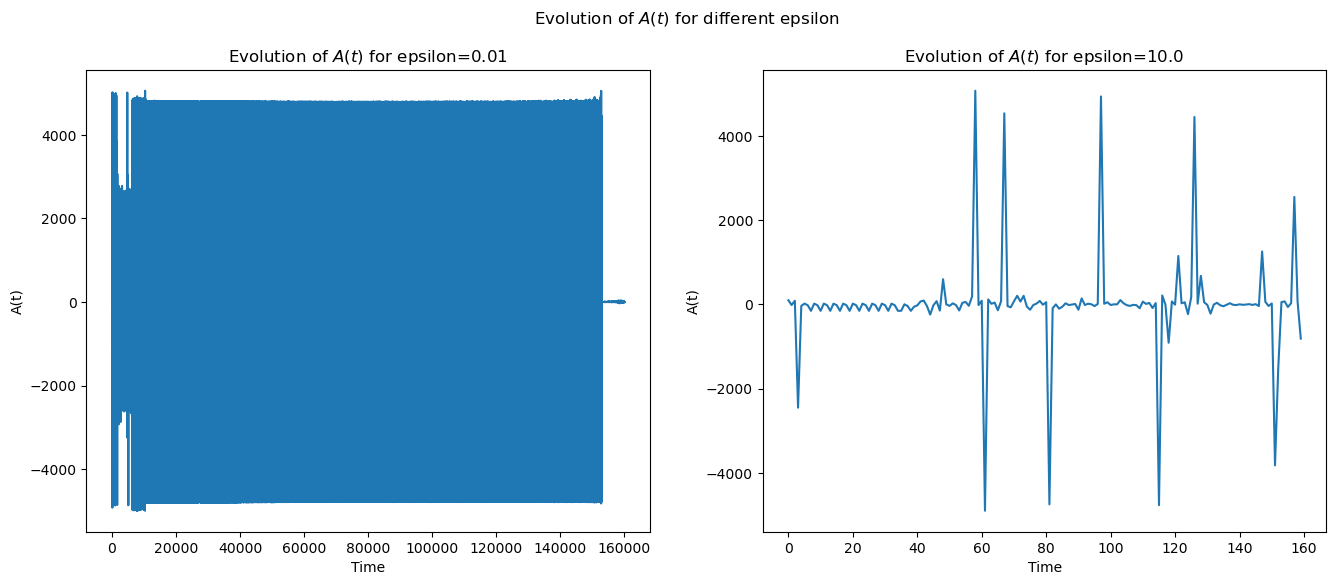

In [11]:
Ns=10**4
Np=P

epsilon_range=np.array([0.01,10])
Time_scale_range=((100*P)/epsilon_range).astype(int)

fig,ax=plt.subplots(1,epsilon_range.shape[0],figsize=(16,6))
fig.suptitle(r'Evolution of $A(t)$ for different epsilon')


for i in range(epsilon_range.shape[0]):

    epsilon=epsilon_range[i]
    Time_scale=Time_scale_range[i]

    A=ABM(Ns,Np,P,epsilon,Time_scale)[0]
    T=np.arange(Time_scale)

    ax[i].plot(T,A)
    ax[i].set_xlabel('Time')
    ax[i].set_ylabel(r'A(t)')
    ax[i].set_title(r'Evolution of $A(t)$ for ' +f'{epsilon=}' )

The greater the value of $\epsilon$ the harder it becomes to enter to the game as $\epsilon$ behaves as a penalization term or a benchmark (for example in a real scenario the risk free rate) where it is only interesting to play if the players cumulative score beats $\epsilon$.

For this reason A(t) becomes siginificantly small as $\epsilon$ increases and almost all of A(t) comes from $\Omega(t)$

### 3) Predictibility dynamics

A realisation of the game for which the parameters explode could be reached with parameters :\
$P=2^{16}$\
$N_p=P$\
$N_s=10^{4}$\
$\epsilon = 0.01$


In [23]:
M=4
P=2**M

Ns=10
Np=10**4

epsilon=0.01
Time_scale=int((400*P)/epsilon)

In [19]:
A=ABM(Ns,Np,P,epsilon,Time_scale)[0]
T=np.arange(Time_scale)

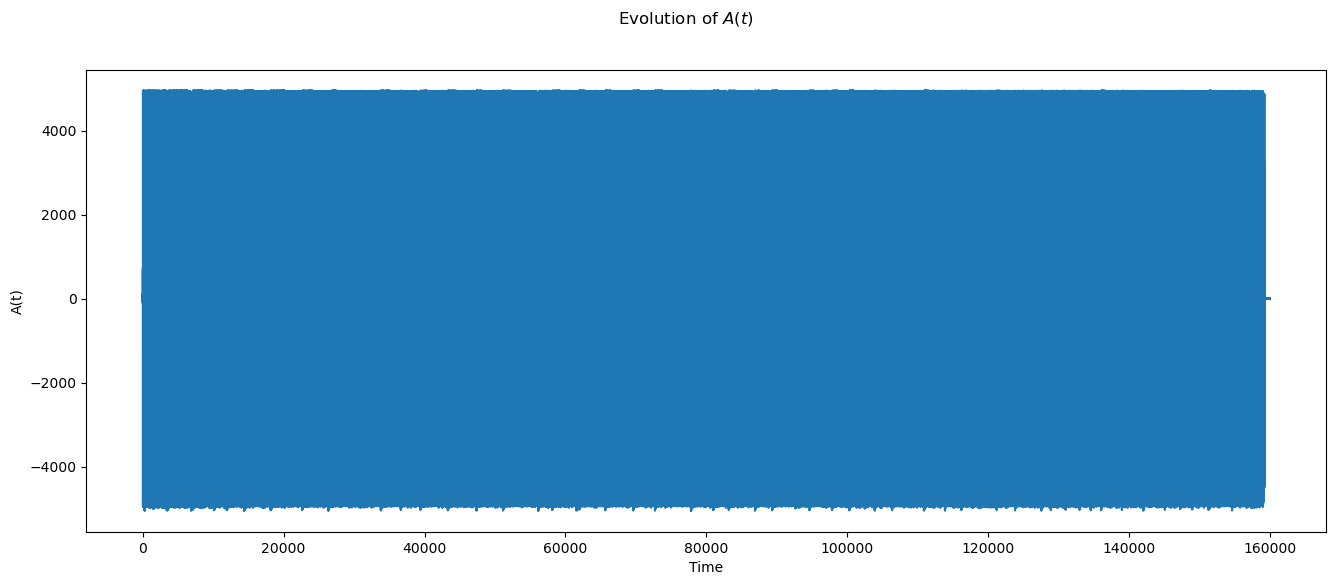

In [17]:
fig, ax = plt.subplots(figsize=(16,6))
fig.suptitle(r'Evolution of $A(t)$')
ax.plot(T,A)
ax.set_xlabel('Time')
ax.set_ylabel(r'A(t)')
plt.show()

The solution does explode and we can use these parameters for the following question : 

In [31]:
def H0(nb_simulation,Ns_list,Np,P,epsilon,Time_scale):

    H0_list=np.zeros(len(Ns_list))
    
    for i in range(len(Ns_list)):

        Ns=Ns_list[i]
        mu_occ=np.zeros(P)
        H0_mu=np.zeros(P)

        for n in range(nb_simulation):
            
            A,mu_list=ABM(Ns,Np,P,epsilon,Time_scale)

            for t in range(int((200*P)/epsilon),Time_scale,10*P):
                mu=mu_list[t]
                H0_mu[mu-1]+=A[t]
                mu_occ[mu-1]+=1

        H0_mu=1/nb_simulation*(H0_mu/mu_occ)
        H0_list[i]=(1/(Ns*P))*np.sum(H0_mu)
    
    return H0_list

In [20]:
def sigma_squared(nb_simulation,Ns_list,Np,P,epsilon,Time_scale):

    sigma_squared_list=np.zeros(len(Ns_list))

    for _ in range(nb_simulation):
        for i in range(len(Ns_list)):
            Ns= Ns_list[i]
            sigma_squared_list[i]+=(np.mean(np.array(ABM(Ns,Np,P,epsilon,Time_scale))**2)/Ns)
    
    sigma_squared_list/=nb_simulation
    return sigma_squared_list

In [ ]:
nb_simulation=15
ns=[1,10,50,70,100,110,120,500,1000] 
Ns_list=list(P*np.array(ns))
Time_scale
H0_list=H0(nb_simulation,Ns_list,Np,P,epsilon,Time_scale)

In [ ]:
sigma_squared_list=sigma_squared(nb_simulation,Ns_list,Np,P,epsilon,Time_scale)

In [ ]:
fig,ax=plt.subplots(1,2,figsize=(16,6))

ax.plot(ns,H0_list)
ax.plot(ns,sigma_squared_list)

plt.show()

The above function takes so much time to run however please find below a description/interpretation of the expected results

The expected result:

H0 curve a decreasing curve that attains zero at a certain critical level of ns ($ns_critic$).\
$\sigma ^2$ is lineary decreasing until $ns_critic$ then quadratically increasing.

We can explain this behaviour as follows:\
The greater ns, the greater is $N_s$ ($N_s = P*ns$) the more speculators we introduce to the market the more predictability is consumed.when the market becomes totally unpredictable, knowing the state of the game A has much probability to be positive as it is to be negative and no bet can be made on the sign of A. The behaviour of the speculators becomes completly random(the behaviour in this game is controlled by the sign of the score U where speculators participate only if U is positive) which explains why $\sigma ^2$ explodes  \
Mathematicaly speaking we can also see the market as an equation :
$$E[A|\mu]=0$$
$$ \Omega^{\mu}+ \sum_{i} a_{i}^{\mu}E(n_i)=0$$
$$ \Omega^{\mu}+ \sum_{i} a_{i}^{\mu}\phi _i =0$$

which is a system of P equations and N_s bounded variables, so if N_s is quite high and surpasses P we can solve this system of equations and obtain H0=0
